# Autoencoder

In [1]:
import os
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

cdir = os.getcwd() + '/autoencoder'

## Import data

### CIFAR-10

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

def load_train():
    data, labels = [], []
    for i in range(1, 6):
        open_data = unpickle(cdir+'/data/cifar-10-batches-py/data_batch_' + str(i))
        if len(data) > 0:
            data = np.vstack((data, open_data['data']))
            labels = np.hstack((labels, open_data['labels']))
        else:
            data = np.array(open_data['data'])
            labels = np.array(open_data['labels'])
    return data, labels

def load_test():
    open_data = unpickle(cdir + '/data/cifar-10-batches-py/test_batch')
    data = np.array(open_data['data'])
    labels = np.array(open_data['labels'])
    return data, labels

data_train, labels_train = load_train()

data_test, labels_test = load_test()

## Preprocess

### CIFAR-10

#### Convert the data to back and white format

In [3]:
def grayscale(im):
    return im.reshape(im.shape[0], 3, 32, 32).mean(1).reshape(im.shape[0], -1)

x_tr = grayscale(data_train)
x_te = grayscale(data_test)

#### Select training set: horse images

In [4]:
x_train_raw = x_tr[labels_train == 7]
x_test_raw = x_te[labels_test == 7]

#### Image visualizer

In [5]:
def plot_image(image, shape=[32, 32], cmap = "Greys_r"):
    plt.imshow(image.reshape(shape), cmap=cmap,interpolation="nearest")
    plt.axis("off")

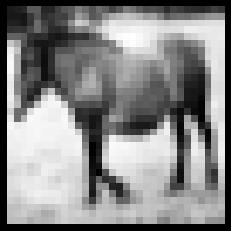

In [6]:
plot_image(x_train_raw[0])

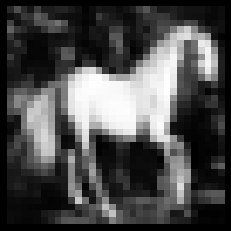

In [7]:
plot_image(x_test_raw[0])

## Training

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


### Simplest autoencoder

In [9]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 32, assuming the input is 1024 floats

# this is our input placeholder
input_img = Input(shape=(1024,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(1024, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
x_train = x_train_raw.astype('float32') / 255.
x_test = x_test_raw.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 5000 samples, validate on 1000 samples
Epoch 1/50
5000/5000 [==============================] - 2s 322us/step - loss: 0.6934 - val_loss: 0.6931
Epoch 2/50
5000/5000 [==============================] - 0s 64us/step - loss: 0.6930 - val_loss: 0.6930
Epoch 3/50
5000/5000 [==============================] - 0s 61us/step - loss: 0.6929 - val_loss: 0.6929
Epoch 4/50
5000/5000 [==============================] - 0s 62us/step - loss: 0.6928 - val_loss: 0.6928
Epoch 5/50
5000/5000 [==============================] - 0s 61us/step - loss: 0.6927 - val_loss: 0.6927
Epoch 6/50
5000/5000 [==============================] - 0s 71us/step - loss: 0.6926 - val_loss: 0.6925
Epoch 7/50
5000/5000 [==============================] - 0s 62us/step - loss: 0.6925 - val_loss: 0.6924
Epoch 8/50
5000/5000 [==============================] - 0s 61us/step - loss: 0.6923 - val_loss: 0.6922
Epoch 9/50
5000/5000 [==============================] - 0s 60us/step - loss: 0.6921 - val_loss: 0.6919
Epoch 10/50
5000/5000 [

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

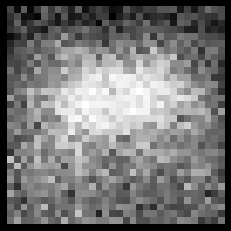

In [15]:
plot_image(decoded_imgs[0])